In [1]:
import numpy as np
from nz_model import NzModel
import matplotlib.pyplot as plt

from modified_redshift import u_dropout
from modified_redshift import g_dropout
from modified_redshift import r_dropout

In [2]:
z_space = np.arange(0, 7, 0.01)

In [3]:
model = NzModel(z_space)

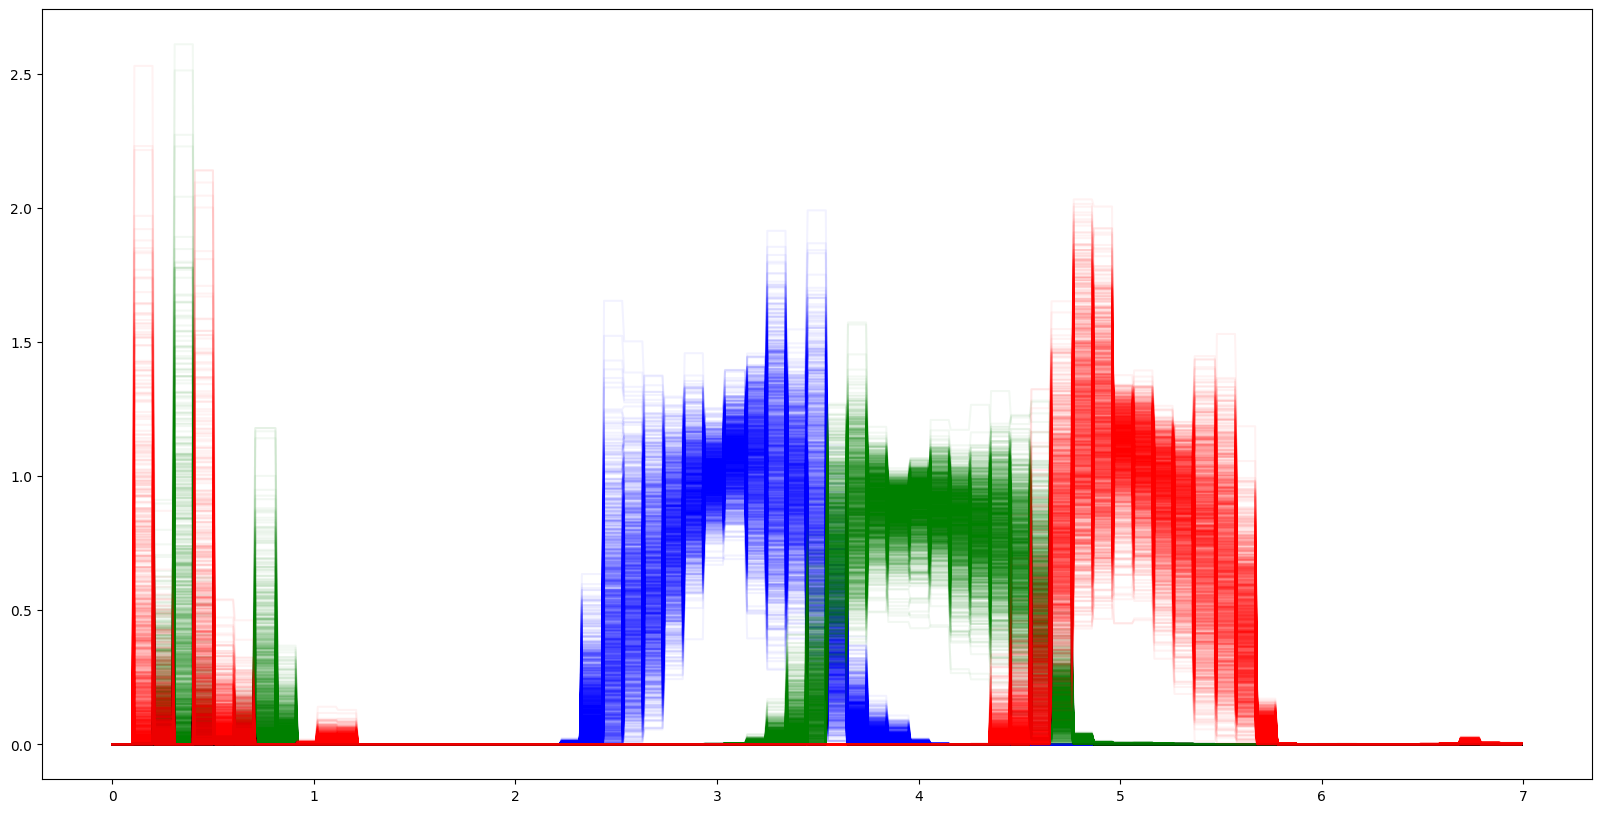

In [4]:
model.plot_all_pca(4, 2000)

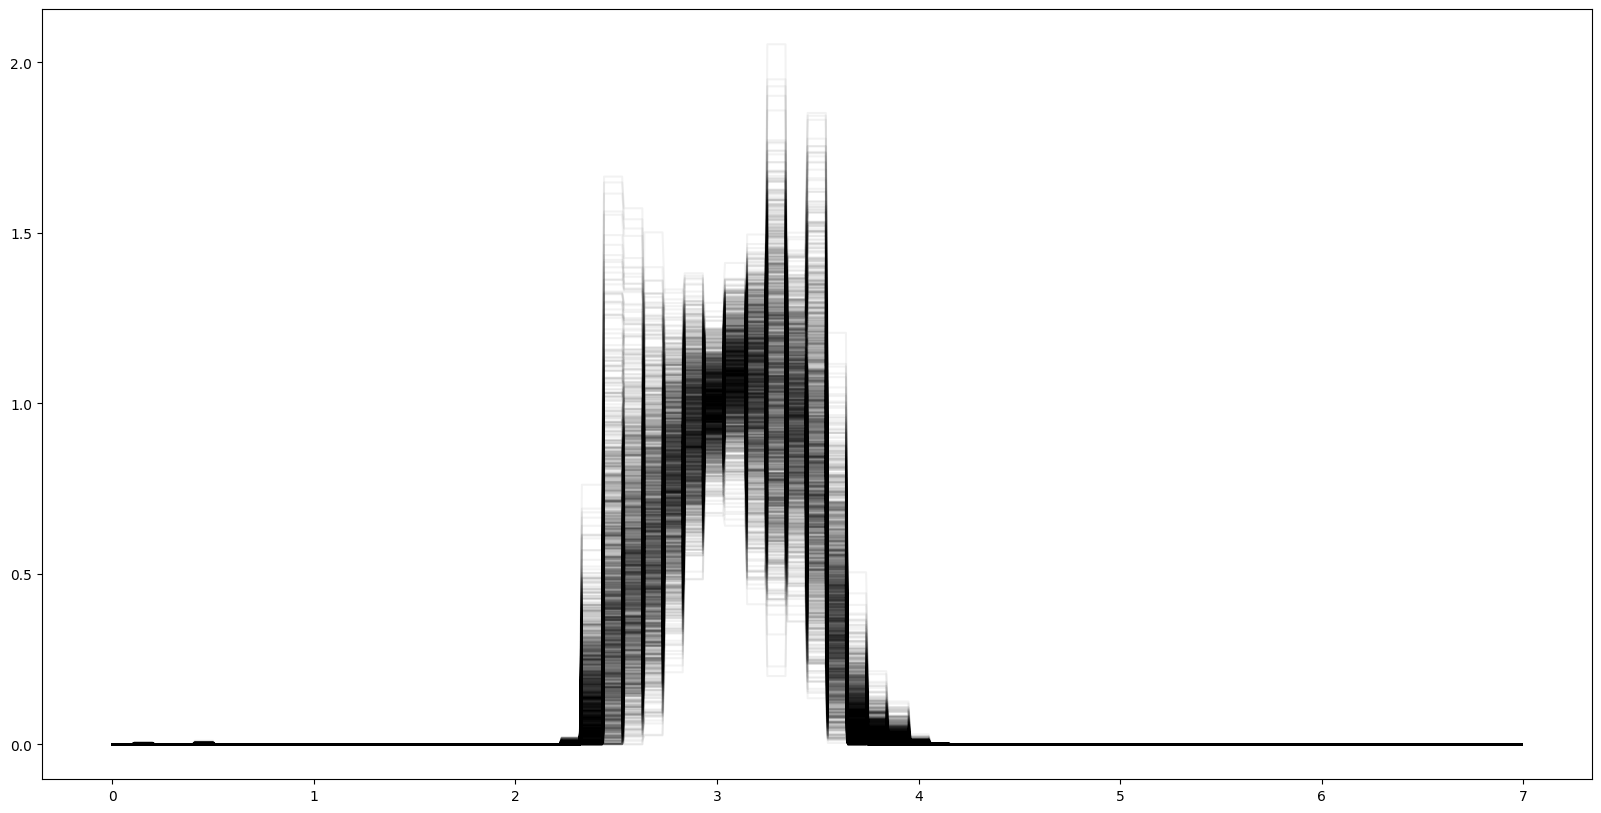

In [5]:
model.plot_nzs(model.u_pca(4, 2000))

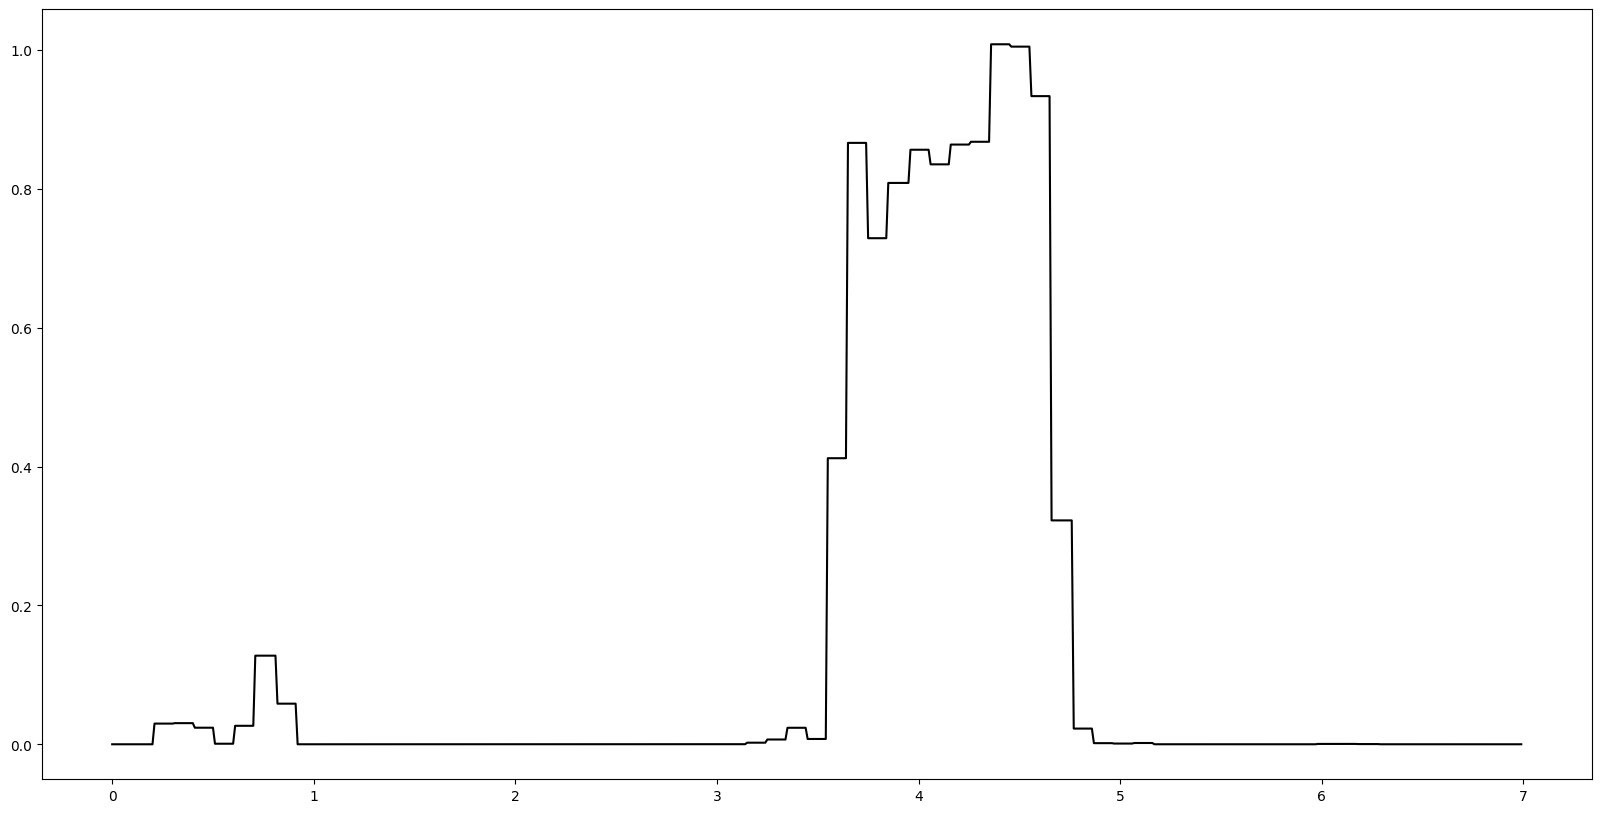

In [6]:
nzs = model.g_pca(4, 100)
nz = nzs[0]
model.plot_nzs(np.array([nz]), alpha=1)

In [7]:
model.interloper_fraction(nz)

0.031037778074450552

In [8]:
model.normalisation(nz)

1.0000000000000002

In [9]:
from nz_model import perform_npca
from nz_model import gauss_npca

In [10]:
bin_data = model.u_data()
components = 10

In [11]:
bin_pca = perform_npca(bin_data, components)

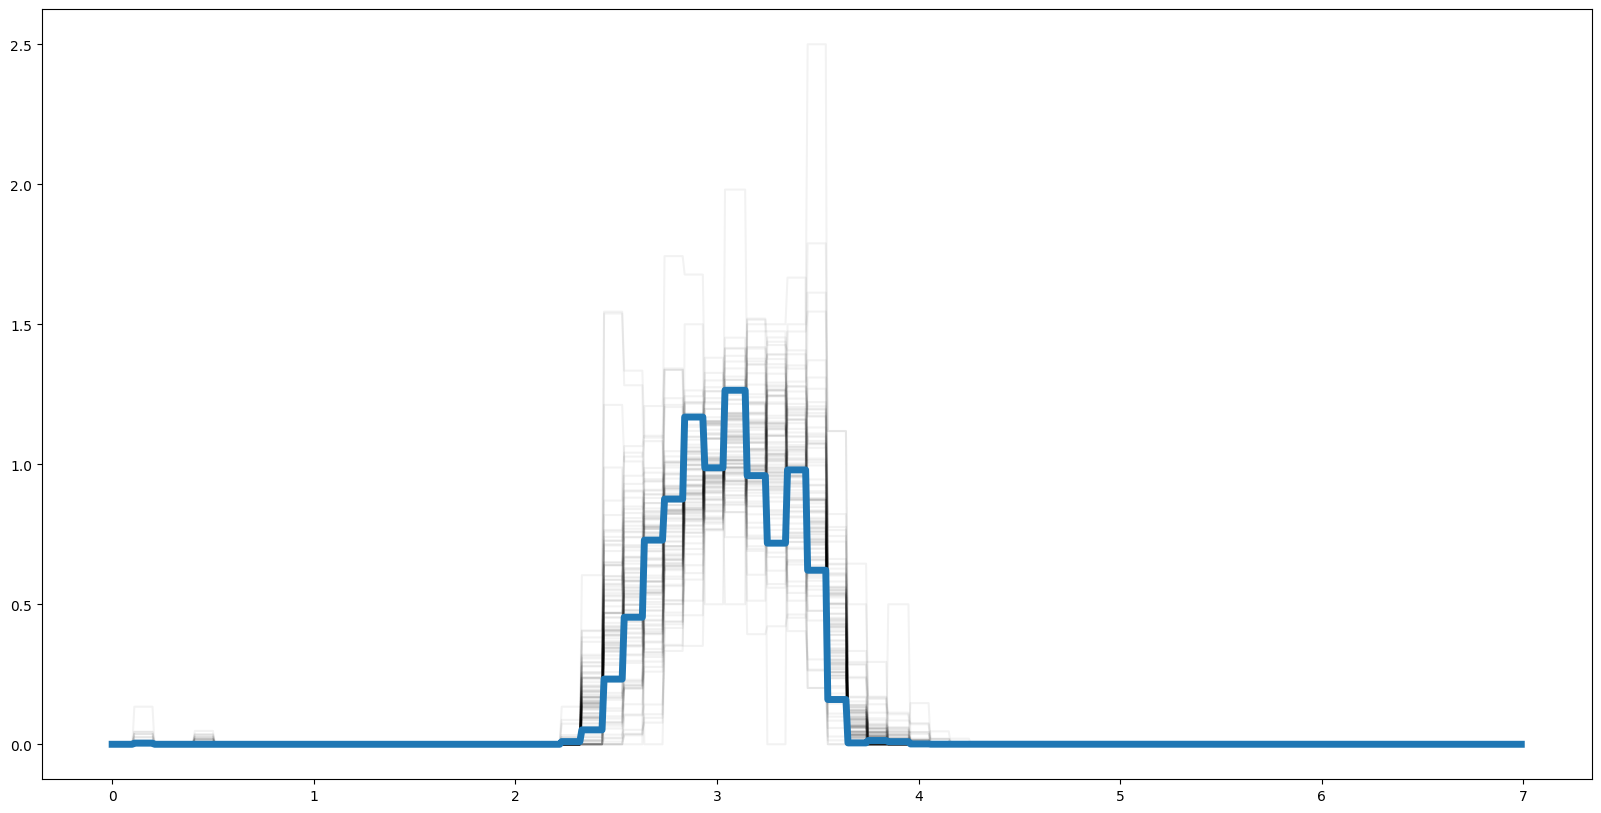

In [12]:
model.plot_nzs(bin_data)
plt.plot(z_space, gauss_npca(bin_pca, 1)[0], lw=5)

In [13]:
model.save_4pca_data()

In [14]:
nz_u = u_dropout((0.5, 0.5, 0.5, 0.5), gals_per_arcmin2 = 1)

In [15]:
arr = []
for z in z_space:
    arr.append(nz_u.pz_fn(z))
    
nzz = np.array(arr)

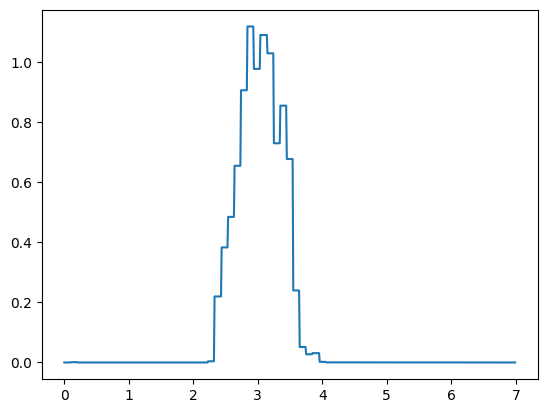

In [16]:
plt.plot(z_space, nzz)

In [22]:
means = np.load("4pca_data/4pca_means_g.npy")
means

array([ 6.75015599e-16,  3.33066907e-17,  9.10382880e-17, -8.89011087e-16])

In [24]:
cov = np.load("4pca_data/4pca_cov_g.npy")
cov

array([[ 3.28193345e+00, -1.67778961e-16, -5.85688065e-16,
        -7.94323059e-17],
       [-1.67778961e-16,  1.64900647e+00, -2.61935270e-15,
         1.40846249e-17],
       [-5.85688065e-16, -2.61935270e-15,  4.01496004e-01,
         1.61761878e-17],
       [-7.94323059e-17,  1.40846249e-17,  1.61761878e-17,
         2.45949786e-01]])

In [25]:
nz_params = np.random.multivariate_normal(means, cov)

In [26]:
nz_g = g_dropout(nz_params, gals_per_arcmin2 = 1)

In [27]:
arr = []
for z in z_space:
    arr.append(nz_g.pz_fn(z))
    
nzz = np.array(arr)

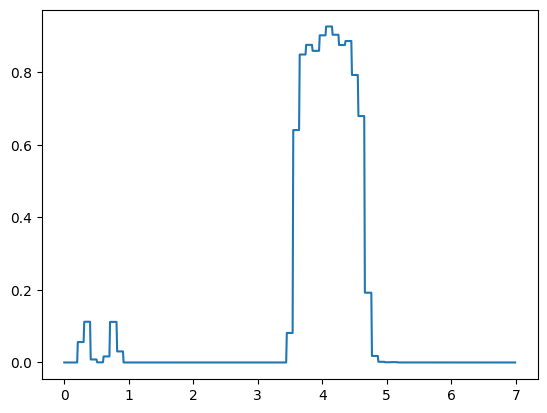

In [28]:
plt.plot(z_space, nzz)